M71 MAESTRÍA EN GESTIÓN Y ANÁLISIS DE DATOS FINANCIEROS

# METODOLOGIAS AVANZADAS DE APRENDIZAJE AUTOMATICO

Macarena Benjamin


**TP 1**

# **Regresion**

## **Introduccion Dataset**

El problema de regresión a resolver que presenta este conjunto de datos se enfoca en predecir la **esperanza de vida** (*variable target: Life expectancy*). El desafío consiste en  analizar los factores que realmente influyen en la esperanza de vida examinando variables predictivas clave. Las variables predictivas ayudan a analizar si la relación entre la esperanza de vida y hábitos de vida como la alimentación, enfermedades, el consumo de alcohol y otros aspectos del estilo de vida influyen en la esperanza de vida. También se evalúa el impacto de la escolarización y de la densidad poblacional, junto con la cobertura de inmunización, en la esperanza de vida de las poblaciones.

## **Extraccion de datos**

Los datos se extraen de la pagina de Kaggle https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

Se importa el archivo a traves de la conexion de la API de Kaggle


In [ ]:
#Se instala Kaggle
!pip install kaggle

In [ ]:
#Conectar API de Kaggle
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat '/content/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
#Link de API de Kaggle a descargar
!kaggle datasets download -d kumarajarshi/life-expectancy-who

Dataset URL: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who
License(s): other
  0% 0.00/119k [00:00<?, ?B/s]
100% 119k/119k [00:00<00:00, 80.7MB/s]


In [ ]:
#Descomprimir zip
!unzip /content/life-expectancy-who.zip

Archive:  /content/life-expectancy-who.zip
  inflating: Life Expectancy Data.csv  


In [ ]:
#Extraer set de datos
import pandas as pd
df = pd.read_csv("/content/Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
#Se verifica que la dimension del set de datos contenga mas de 1000 filas y mas de 20 columnas
df.shape

(2938, 22)

In [ ]:
#Se verfican los tipos de datos del dataset
df.dtypes

,0
Country,object
Year,int64
Status,object
Life expectancy,float64
Adult Mortality,float64
infant deaths,int64
Alcohol,float64
percentage expenditure,float64
Hepatitis B,float64
Measles,int64


## **Limpieza de datos**

In [ ]:
#Se verifica si tiene datos nulos
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [ ]:
print(df.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [ ]:
#Eliminar espacios innecesarios o dobles en los nombres de las columnas
df.columns = df.columns.str.replace(r'\s+', ' ', regex=True).str.strip()

#Imputar valores nulos con la media en las columnas especificadas
df['Life expectancy'] = df['Life expectancy'].fillna(df['Life expectancy'].mean())
df['Adult Mortality'] = df['Adult Mortality'].fillna(df['Adult Mortality'].mean())
df['Alcohol'] = df['Alcohol'].fillna(df['Alcohol'].mean())
df['Hepatitis B'] = df['Hepatitis B'].fillna(df['Hepatitis B'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())
df['Polio'] = df['Polio'].fillna(df['Polio'].mean())
df['Total expenditure'] = df['Total expenditure'].fillna(df['Total expenditure'].mean())
df['Diphtheria'] = df['Diphtheria'].fillna(df['Diphtheria'].mean())
df['GDP'] = df['GDP'].fillna(df['GDP'].mean())
df['Population'] = df['Population'].fillna(df['Population'].mean())
df['thinness 1-19 years'] = df['thinness 1-19 years'].fillna(df['thinness 1-19 years'].mean())
df['thinness 5-9 years'] = df['thinness 5-9 years'].fillna(df['thinness 5-9 years'].mean())
df['Income composition of resources'] = df['Income composition of resources'].fillna(df['Income composition of resources'].mean())
df['Schooling'] = df['Schooling'].fillna(df['Schooling'].mean())


In [ ]:
#Verificar correccion de nulos
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


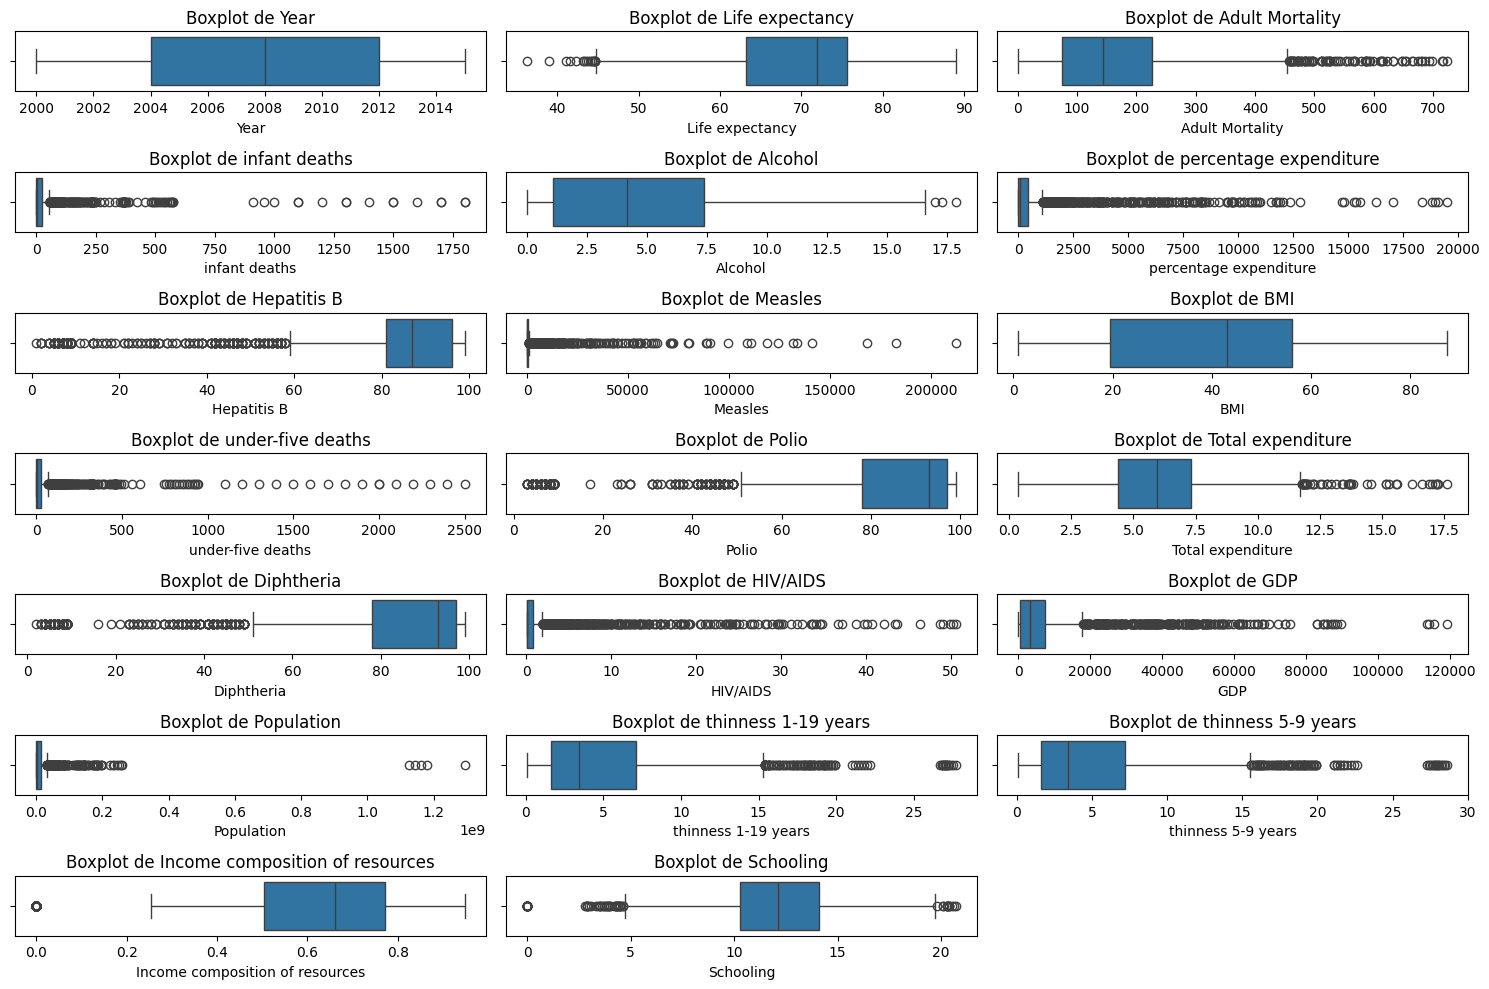

In [ ]:
#Se verifica mediante boxplot deteccion de posibles outliers
import matplotlib.pyplot as plt
import seaborn as sns

#Seleccionar solo las columnas numericas del DataFrame
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

#Crear un boxplot para cada columna numerica
plt.figure(figsize=(15, 10))

#Loop a traves de cada columna numerica y crear un boxplot
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)  # 3 columnas por fila
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot de {column}')
    plt.tight_layout()  # Ajusta el espacio entre graficos

plt.show()


In [ ]:
#Se crea una copia del DataFrame para no modificar el original
df_clean = df.copy()

In [ ]:
import pandas as pd

#Funcion ajustada para eliminar solo los outliers mas alejados
def eliminar_outliers_ajustado(df_clean, columns, umbral=2.5):


    for col in columns:
        # Calcular Q1 (percentil 25) y Q3 (percentil 75)
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1

        # Definir limites superior e inferior con un umbral ajustado
        lower_bound = Q1 - umbral * IQR
        upper_bound = Q3 + umbral * IQR

        # Filtrar los datos
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    return df_clean

#Lista de columnas donde se detectaron outliers
columns = ['infant deaths', 'Adult Mortality', 'percentage expenditure', 'Hepatitis B','Measles', 'under-five deaths', 'Polio', 'Diphtheria', 'GDP', 'HIV/AIDS', 'Population', 'thinness 1-19 years','thinness 5-9 years']

#Eliminar los outliers mas alejados
data_clean = eliminar_outliers_ajustado(df_clean, columns, umbral=2.5)

#Ver los datos
data_clean.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
17,Albania,2014,Developing,77.5,8.0,0,4.51,428.749067,98.0,0,...,98.0,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2
18,Albania,2013,Developing,77.2,84.0,0,4.76,430.876979,99.0,0,...,99.0,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2
19,Albania,2012,Developing,76.9,86.0,0,5.14,412.443356,99.0,9,...,99.0,5.59,99.0,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2
20,Albania,2011,Developing,76.6,88.0,0,5.37,437.062100,99.0,28,...,99.0,5.71,99.0,0.1,4437.178680,295195.0,1.4,1.5,0.738,13.3


In [ ]:
#Se verifica las dimensiones del nuevo dataset
data_clean.shape

(1210, 22)

## **Preparacion del set de datos**

In [ ]:
#Se aplica dummies a las variables categoricas
data = pd.get_dummies(data_clean, dtype=int)
data.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom of Great Britain and Northern Ireland,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Status_Developed,Status_Developing
16,2015,77.8,74.0,0,4.60,364.975229,99.0,0,58.0,0,...,0,0,0,0,0,0,0,0,0,1
17,2014,77.5,8.0,0,4.51,428.749067,98.0,0,57.2,1,...,0,0,0,0,0,0,0,0,0,1
18,2013,77.2,84.0,0,4.76,430.876979,99.0,0,56.5,1,...,0,0,0,0,0,0,0,0,0,1
19,2012,76.9,86.0,0,5.14,412.443356,99.0,9,55.8,1,...,0,0,0,0,0,0,0,0,0,1
20,2011,76.6,88.0,0,5.37,437.062100,99.0,28,55.1,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#Normalizacion
data = (data - data.min()) / (data.max() - data.min())
data.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom of Great Britain and Northern Ireland,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Status_Developed,Status_Developing
16,1.000000,0.705263,0.177184,0.0,0.265318,0.212555,1.000000,0.000000,0.656506,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17,0.933333,0.697368,0.016990,0.0,0.260116,0.249695,0.981818,0.000000,0.647128,0.02381,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18,0.866667,0.689474,0.201456,0.0,0.274566,0.250935,1.000000,0.000000,0.638921,0.02381,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19,0.800000,0.681579,0.206311,0.0,0.296532,0.240199,1.000000,0.012146,0.630715,0.02381,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20,0.733333,0.673684,0.211165,0.0,0.309827,0.254537,1.000000,0.037787,0.622509,0.02381,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Se verifica la dimension
data.shape

(1210, 158)

In [ ]:
#Se convierten las variables a tipo "float32" esto se tiene que hacer para trabajar un entorno de T4GPU
data = data.astype("float32")

In [ ]:
# Se verifican tipo de variables
pd.set_option('display.max_columns', None)
data.dtypes

,0
Year,float32
Life expectancy,float32
Adult Mortality,float32
infant deaths,float32
Alcohol,float32
...,...
Country_Uzbekistan,float32
Country_Vanuatu,float32
Country_Venezuela (Bolivarian Republic of),float32
Status_Developed,float32


In [ ]:
#Se separan en subconjutos X e y
X = data[data.columns.drop("Life expectancy")]
y = data["Life expectancy"]

## **Keras (version funcional)**

In [ ]:
import numpy as np

from tensorflow import keras

In [ ]:
#Este metodo me permite concatenar varios inputs

#entrada
inputs = keras.layers.Input(shape=(X.shape[1],)) #defino los inputs

#capas ocultas
h1 = keras.layers.Dense(256, activation="relu")(inputs) #Se usa en las capas ocultas "relu" dado que puede mejorar el rendimiento del modelo, ya que permite que capture relaciones mas complejas
h2 = keras.layers.Dense(128, activation="relu")(h1)

#salida
outputs = keras.layers.Dense(1, activation="sigmoid")(h2) #Se puede usar lineal o sigmoid dado que estan normalizados los datos

model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 157)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │          40,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73,473 (287.00 KB)

 Trainable params: 73,473 (287.00 KB)

 Non-trainable params: 0 (0.00 B)

### **Entrenamiento y optimizaciones**

In [ ]:
#Defino las metricas para evaluar el modelo

metrics = [
    keras.metrics.MeanSquaredError(name="mse"),
    keras.metrics.MeanAbsoluteError(name="mae"),
    keras.metrics.RootMeanSquaredError(name="rmse"),

]

#Se compila el modelo
#Se elige el optimizador Adam dado que combina las ventajas de los algoritmos de AdaGrad y RMSProp
#Se elige como funcion de perdida error medio cuadratico al tratarse de un problema de regresion
model.compile(optimizer="adam", loss="mean_squared_error", metrics=metrics)

In [ ]:
#Se entrena el modelo:

#batch o lote: Se prueba procesando 32 ejemplos a la vez antes de hacer una actualizacion.

#epochs: Se prueba con 30 epocas

#validation_split: En este caso se entrena con 80% y se testea con 20%


history = model.fit(X, y, batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0124 - mae: 0.0852 - mse: 0.0124 - rmse: 0.1107 - val_loss: 0.0073 - val_mae: 0.0675 - val_mse: 0.0073 - val_rmse: 0.0856
Epoch 2/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0040 - mae: 0.0465 - mse: 0.0040 - rmse: 0.0632 - val_loss: 0.0074 - val_mae: 0.0688 - val_mse: 0.0074 - val_rmse: 0.0858
Epoch 3/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024 - mae: 0.0327 - mse: 0.0024 - rmse: 0.0493 - val_loss: 0.0078 - val_mae: 0.0701 - val_mse: 0.0078 - val_rmse: 0.0882
Epoch 4/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0018 - mae: 0.0278 - mse: 0.0018 - rmse: 0.0419 - val_loss: 0.0087 - val_mae: 0.0749 - val_mse: 0.0087 - val_rmse: 0.0930
Epoch 5/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0015 - mae: 0.0248 - mse: 0.0015 - rmse: 0.0393 - val_loss: 0.0088 - val_mae: 0.0765 - val_mse: 0.0088 - val_rmse: 0.0938
Epoch 6/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0014 - mae: 0.0255 - mse: 0.0

In [ ]:
#Se prueba reduciendo la cantidad de epocas a 20 dado que a partir de la epoca 14 la perdida se hace muy chica
#Se aumenta el tamaño de lote a 64 para mejorar la estabilidad y acelerar el proceso de entrenamiento
history = model.fit(X, y, batch_size=64, epochs=20, validation_split=0.2)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 5.6712e-04 - mae: 0.0146 - mse: 5.6712e-04 - rmse: 0.0238 - val_loss: 0.0107 - val_mae: 0.0847 - val_mse: 0.0107 - val_rmse: 0.1036
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.0627e-04 - mae: 0.0135 - mse: 6.0627e-04 - rmse: 0.0245 - val_loss: 0.0104 - val_mae: 0.0835 - val_mse: 0.0104 - val_rmse: 0.1021
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.5766e-04 - mae: 0.0100 - mse: 3.5766e-04 - rmse: 0.0185 - val_loss: 0.0106 - val_mae: 0.0843 - val_mse: 0.0106 - val_rmse: 0.1027
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.9467e-04 - mae: 0.0112 - mse: 3.9467e-04 - rmse: 0.0197 - val_loss: 0.0106 - val_mae: 0.0829 - val_mse: 0.0106 - val_rmse: 0.1031
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8618e-04 - mae: 0.0133 - mse: 4.8618e-04 - rmse: 0.0220 - val_loss: 0.0105 - val_mae: 0.0853 - val_mse: 0.0105 - val_rmse: 0.1024
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Mejoras respecto a la optimizacion:
- Perdida de Entrenamiento:

El primer modelo comienza con una perdida de entrenamiento significativamente mayor en comparación con el segundo modelo, pero reduce su pérdida a lo largo de las epocas.
El segundo modelo comienza con una perdida muy baja y se mantiene en un rango similar a lo largo de las épocas.

- MAE:

El primer modelo muestra un MAE mayor que el segundo modelo en la primera epoca, pero ambos modelos presentan valores similares al final de sus respectivas épocas.

- Perdida de Validacion:

El primer modelo tiene una mayor pérdida de validación en comparación con el segundo modelo, lo que podría indicar que el segundo modelo se está ajustando mejor a los datos de validación desde el principio.

- Rendimiento General:

El primer modelo tiene un rendimiento que mejora significativamente a lo largo de 30 épocas, mientras que el segundo modelo comienza con un buen rendimiento y se mantiene consistente, aunque su mejora es menos pronunciada.


- Conclusiones:

En general, aunque ambos modelos están mejorando, el segundo modelo parece estar funcionando mejor en terminos de errores de prediccion desde el principio.

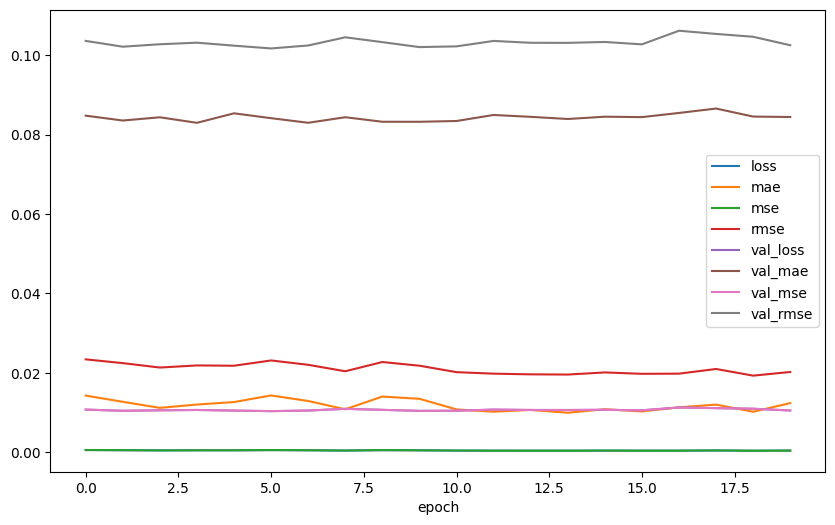

In [ ]:
#Hago un grafico con las metricas

history_df= pd.DataFrame(history.history)
history_df.plot(xlabel="epoch", figsize=(10,6));

In [ ]:
#Extraer los resultados de la ultima epoca
final_epoch = len(history.history['loss']) - 1  # Índice de la ultima epoca

#Mostrar metricas de la ultima epoca
print("Resultados de la ultima epoca:")
print("Pérdida (loss):", round(history.history['loss'][final_epoch], 10))
print("MSE:", round(history.history['mse'][final_epoch], 10))
print("MAE:", round(history.history['mae'][final_epoch], 10))
print("RMSE:", round(np.sqrt(history.history['mse'][final_epoch]), 10))

#Metricas de validacion de la última época:
print("Perdida de validacion (val_loss):", round(history.history['val_loss'][final_epoch], 10))
print("MSE de validacion:", round(history.history['val_mse'][final_epoch], 10))
print("MAE de validacion:", round(history.history['val_mae'][final_epoch], 10))
print("RMSE de validación:", round(np.sqrt(history.history['val_mse'][final_epoch]), 10))

Resultados de la ultima epoca:
Pérdida (loss): 0.0004082338
MSE: 0.0004082338
MAE: 0.0123644918
RMSE: 0.0202047975
Perdida de validacion (val_loss): 0.0105033256
MSE de validacion: 0.0105033256
MAE de validacion: 0.0844104886
RMSE de validación: 0.1024857337


## **Scikit learn**

In [ ]:
#Se utilizan los mismos subconjutos X e y
#X = data[data.columns.drop("Life expectancy")]
#y = data["Life expectancy"]

#Se importan librerias
import sklearn as sk
from sklearn import model_selection
from sklearn import neural_network
from sklearn import metrics

In [ ]:
#Entreno el modelo con un 20% de test y fijo semilla 2024
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.20, random_state=2024)

In [ ]:
#Defino el tamaño (cantidad de neuronas) de las capas ocultas (capa entrada, capa oculta 1 = 56 , capa oculta 2 = 12 y capa de salida)
#Defino la funcion de activacion (en este caso relu)
#Defino cantidad de iteraciones (en este caso 500)
#Fijo semilla 2024
reg = sk.neural_network.MLPRegressor(hidden_layer_sizes=[56, 12], activation='relu', max_iter=500, random_state=2024)
reg.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=[56, 12], max_iter=500, random_state=2024)

In [ ]:
#Prediccion de valores
# reg es un modelo de regresion donde utiliza el conjunto de datos de prueba X_test (que contiene las características de entrada) para predecir los valores correspondientes (y_pred).
y_pred = reg.predict(X_test)

In [ ]:
#Metricas de medicion
#Indica cuán cercanas están las predicciones (y_pred) de los valores reales (y_test).
#Un valor de RMSE más bajo significa que las predicciones están más cerca de los valores observados.


mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = metrics.mean_absolute_error(y_test, y_pred)

# Imprimir los resultados
# Mostrar métricas de la última época con 10 decimales
print(f"MSE: {mse:.10f}")
print(f"MAE: {mae:.10f}")
print(f"RMSE: {rmse:.10f}")

MSE: 0.0033661732
MAE: 0.0376089029
RMSE: 0.0580187328


### **Optimizacion**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

#Definir el grid de parametros: se agregan otras combinaciones
param_grid = {
    'hidden_layer_sizes': [(56, 12), (64, 32), (128, 64)],
    'activation': ['relu'],
    'max_iter': [200, 500, 1000],
}

#Usar GridSearchCV para buscar los mejores parametros
grid_search = GridSearchCV(estimator=reg, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

#Ajustar el modelo
grid_search.fit(X_train, y_train)

#Obtener el mejor modelo y parametros
best_model = grid_search.best_estimator_

#Realizar predicciones
predictions = best_model.predict(X_test)

#Calcular metricas
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)

#Imprimir resultados
print("Best Parameters:", grid_search.best_params_)
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)


Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (128, 64), 'max_iter': 200}
MSE: 0.0024717154
MAE: 0.030765222
RMSE: 0.04971635


## **Random Forest**

In [ ]:
#Se importan librerias
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [ ]:
#Crear el modelo de Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=2024)

#Entrenar el modelo en el conjunto de entrenamiento
rf.fit(X_train, y_train)

#Hacer predicciones en el conjunto de prueba
y_pred = rf.predict(X_test)

#Evaluar el rendimiento del modelo utilizando el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.10f}")

#Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.10f}")

#Calcular el error cuadrático medio raíz (RMSE)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.10f}")



MSE: 0.0022056976
MAE: 0.0269415911
RMSE: 0.0469648550


### **Optimizacion**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [3, 5, 7]}
grid_rf = GridSearchCV(RandomForestRegressor(random_state=2024), param_grid, cv=10, scoring='neg_mean_squared_error')
grid_rf.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_rf.best_params_)
print("Mejor MSE promedio:", -grid_rf.best_score_)

Mejores hiperparámetros: {'max_depth': 7, 'n_estimators': 100}
Mejor MSE promedio: 0.0022794623704339963


In [ ]:
#Se usan los mejores estimadores
best_rf = grid_rf.best_estimator_
best_rf

RandomForestRegressor(max_depth=7, random_state=2024)

In [ ]:
#Predicciones
y_test_pred=best_rf.predict(X_test)
y_train_pred=best_rf.predict(X_train)

In [ ]:
#Calcular las medidas para el conjunto de entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

#Calcular las medidas para el conjunto de prueba
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

#Formatear los valores con 10 decimales y organizar el formato en viñetas
resultados = [
    f"• Conjunto: Entrenamiento:\n  MSE: {mse_train:.10f}\n  MAE: {mae_train:.10f}\n  RMSE: {rmse_train:.10f}",
    f"• Conjunto: Prueba:\n  MSE: {mse_test:.10f}\n  MAE: {mae_test:.10f}\n  RMSE: {rmse_test:.10f}"
]

#Mostrar los resultados uno debajo del otro
for resultado in resultados:
    print(resultado)


• Conjunto: Entrenamiento:
  MSE: 0.0010041394
  MAE: 0.0225807635
  RMSE: 0.0316881589
• Conjunto: Prueba:
  MSE: 0.0027379253
  MAE: 0.0340151743
  RMSE: 0.0523251882


## **Gradient Boosting**

In [ ]:
#Aplicacion
import sklearn
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, random_state=2024)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=2024)

In [ ]:
#predicciones
ypred_test_gbr = gbr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

#Calcular MSE
mse = mean_squared_error(y_test, ypred_test_gbr)
print(f"MSE: {mse:.10f}")

#Calcular MAE
mae = mean_absolute_error(y_test, ypred_test_gbr)
print(f"MAE: {mae:.10f}")

#Calcular RMSE
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.10f}")

MSE: 0.0024921811
MAE: 0.0335593087
RMSE: 0.0499217494


### **Optimizacion**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

#Varias opciones de modelos para encontrar los mejores parametros
lr_list = [0.1, 0.25, 0.5, 0.75, 1]
ne_list = [50, 100, 150, 200, 250, 300, 400, 500]

LR_GBr = []
NE_GBr = []
RMSE_test = []
MSE_test = []
MAE_test = []

for learning_rate in lr_list:
    for n_estimators in ne_list:
        gbr_2 = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, random_state=2024)
        gbr_2.fit(X_train, y_train)

        #Almacenar los parametros
        LR_GBr.append(learning_rate)
        NE_GBr.append(n_estimators)

        #Hacer predicciones
        y_pred_test = gbr_2.predict(X_test)

        #Calcular y almacenar las metricas
        RMSE_test.append(round(mean_squared_error(y_test, y_pred_test, squared=False), 4))
        MSE_test.append(round(mean_squared_error(y_test, y_pred_test), 4))
        MAE_test.append(round(mean_absolute_error(y_test, y_pred_test), 4))


#Imprimir las listas de resultados y convertirlas en un DataFrame ordenandolo por el MSE mas bajo
import pandas as pd

resultados_GB = pd.DataFrame({
    'Learning Rate': LR_GBr,
    'Number of Estimators': NE_GBr,
    'RMSE': RMSE_test,
    'MSE': MSE_test,
    'MAE': MAE_test

})

resultados_GB = pd.DataFrame(resultados_GB)
resultados_GB.sort_values('MSE', ascending=True)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

,Learning Rate,Number of Estimators,RMSE,MSE,MAE
7,0.10,500,0.0452,0.0020,0.0274
15,0.25,500,0.0450,0.0020,0.0254
14,0.25,400,0.0454,0.0021,0.0258
5,0.10,300,0.0461,0.0021,0.0291
6,0.10,400,0.0454,0.0021,0.0278
12,0.25,250,0.0462,0.0021,0.0271
13,0.25,300,0.0459,0.0021,0.0264
4,0.10,250,0.0467,0.0022,0.0298
10,0.25,150,0.0468,0.0022,0.0286
11,0.25,200,0.0466,0.0022,0.0280


In [ ]:
#Aplicacion
gbr_3 = GradientBoostingRegressor( n_estimators=500, learning_rate=0.1, random_state=2024)
gbr_3.fit(X_train, y_train)
ypred_test_gbr_3 = gbr_3.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calcular MSE con 10 decimales
MSE_GBR = round(mean_squared_error(y_test, ypred_test_gbr_3), 10)
print("MSE:", MSE_GBR)

# Calcular MAE con 10 decimales
MAE_GBR = round(mean_absolute_error(y_test, ypred_test_gbr_3), 10)
print("MAE:", MAE_GBR)

# Calcular RMSE con 10 decimales
RMSE_GBR = round(mean_squared_error(y_test, ypred_test_gbr_3, squared=False), 10)
print("RMSE:", RMSE_GBR)


MSE: 0.0020387165
MAE: 0.0274347394
RMSE: 0.0451521482


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Finalmente, se puede concluir que los metodos tradicionales son mejores para predecir que las redes neuronales de Keras y de Scikit learn siendo Gradient Boost para este caso mejor que Random Forest.

# **Clasificacion**

## **Introduccion Dataset**

El problema de clasificación binaria a resolver que presenta este conjunto de datos se enfoca en predecir el **abandono** *(variable target: Churn)*. El dataset Telco Customer Churn está diseñado para predecir el comportamiento de los clientes y ayudar a desarrollar programas enfocados en la retención. Cada fila del conjunto de datos representa un cliente, mientras que las columnas contienen información detallada sobre sus características. Incluye datos sobre si el cliente ha abandonado el servicio en el último mes, los servicios a los que se ha suscrito, como teléfono, múltiples líneas, internet, seguridad en línea, protección de dispositivos, soporte técnico y servicios de streaming. Además, se proporciona información sobre la cuenta del cliente, como la duración de su contrato, el método de pago utilizado, si opta por la facturación sin papel, los cargos mensuales y los cargos totales acumulados. También se incluyen datos demográficos, como el género, el rango de edad, y si el cliente tiene pareja o dependientes. Todo esto permite analizar los patrones de comportamiento de los clientes y desarrollar estrategias que ayuden a predecir el churn.

## **Extraccion de datos**

Los datos se extraen de la pagina de Kaggle https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data

Se importa el archivo a traves de la conexion de la API de Kaggle

In [ ]:
#Se instala Kaggle
!pip install kaggle

In [ ]:
#Conectar API de Kaggle
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat '/content/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
#Link de API de Kaggle a descargar
!kaggle datasets download -d blastchar/telco-customer-churn

Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 69.1MB/s]


In [ ]:
#Descomprimir zip
!unzip /content/telco-customer-churn.zip

Archive:  /content/telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


In [ ]:
#Extraer set de datos
import pandas as pd
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#Se verifica que la dimension del set de datos contenga mas de 1000 filas y mas de 20 columnas
df.shape

(7043, 21)

In [ ]:
#Se elimina la columna customerID ya que no aporta informacion relevante para el analisis
df = df.drop('customerID', axis=1)

In [ ]:
#Se verfican los tipos de datos del dataset
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [ ]:
#Convertir 1 en "Yes" y 0 en "No" a la variable SeniorCitizen para convertirla en categorica
df['SeniorCitizen'] = df['SeniorCitizen'].replace({ 1: 'Yes', 0: 'No'})

#Convertir TotalCharges a variable numerica
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

#Convertir "Yes" en 1 y "No" en 0 en la columna Churn (target) para convertirla en numerica
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

<ipython-input-9-c856aa7f3a1d>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})


In [ ]:
#Se verifica
df.dtypes

,0
gender,object
SeniorCitizen,object
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


## **Limpieza de datos**

In [ ]:
#Se verifica si tiene datos nulos
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
#Se eliminan registros nulos
df = df.dropna()

In [ ]:
#Se verifican nulos
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


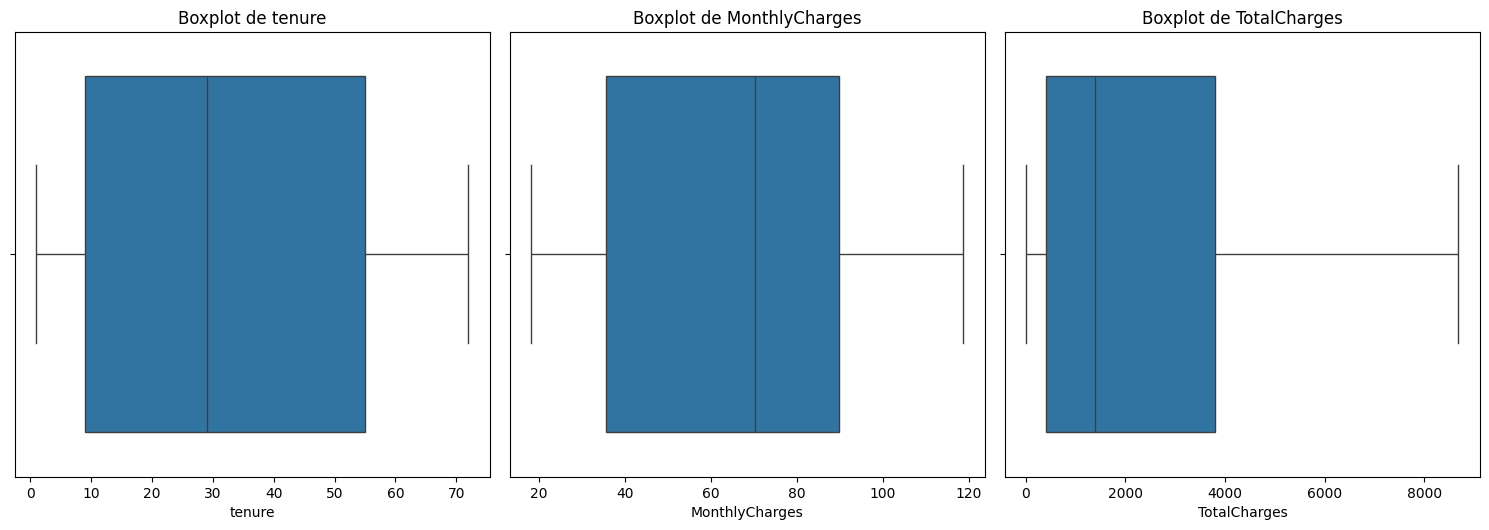

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Seleccionar solo las columnas numericas del DataFrame
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

#Excluir la columna 'Churn' que es la variable target
numeric_columns = numeric_columns.drop('Churn')

#Crear un boxplot para cada columna numerica restante
plt.figure(figsize=(15, 10))

#Loop a traves de cada columna numerica y crear un boxplot
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)  # 3 columnas por fila
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot de {column}')
    plt.tight_layout()  #Ajusta el espacio entre gráficos

plt.show()


No se encuentran valores anomalos significativos

In [ ]:
#Se verifica las dimensiones del dataset
df.shape

(7032, 20)

## **Preparacion del set de datos**

In [ ]:
#Se aplica dummies a las variables categoricas
data = pd.get_dummies(df, dtype=int)
data.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
#Verificacion de la distribucion de clases de la variable target Churn
print(data['Churn'].value_counts())

Churn
0    5163
1    1869
Name: count, dtype: int64


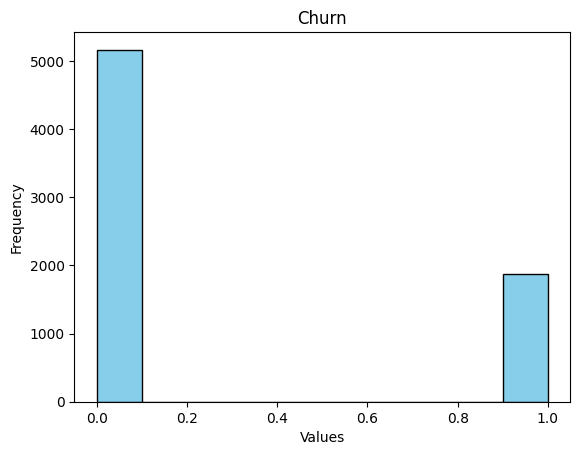

In [ ]:
#Se verifica que las clases estan desbalanceadas
#Se grafican las clases
import matplotlib.pyplot as plt
import numpy as np

#Grafico
plt.hist(data['Churn'], color='skyblue', edgecolor='black')


plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Churn')


plt.show()

In [ ]:
#Se balancean las clases usando SMOTE
from imblearn.over_sampling import SMOTE

#Separamos en conjuntos X e y
X = data.drop('Churn', axis=1)  #Caracteristicas
y = data['Churn']  #Variable objetivo (Churn)


# Aplicar SMOTE al conjunto completo de datos
smote = SMOTE(random_state=2024)
X_smote, y_smote = smote.fit_resample(X, y)

# Verificar distribucion de clases despues de SMOTE
print(f"Distribución de clases después de SMOTE: {y_smote.value_counts()}")

Distribución de clases después de SMOTE: Churn
0    5163
1    5163
Name: count, dtype: int64


In [ ]:
# Normalizar X_smote ya que la variable target y_smote es binaria 0 y 1
X_smote_normalized = (X_smote - X_smote.min()) / (X_smote.max() - X_smote.min())

In [ ]:
#Se verifica la normalizacion
X_smote_normalized.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.000000,0.115423,0.001275,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.464789,0.385075,0.215867,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.014085,0.354229,0.010310,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.619718,0.239303,0.210241,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.014085,0.521891,0.015330,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
#Convertir a float32 para usar GPU
X_smote_normalized = X_smote_normalized.astype(np.float32)
y_smote = y_smote.astype(np.float32)

#Combinar X_smote_normalized con y_smote para tener un solo DataFrame
data = pd.concat([X_smote_normalized, y_smote.reset_index(drop=True)], axis=1)

#Revisar los primeros registros del nuevo DataFrame
data.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0.000000,0.115423,0.001275,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.464789,0.385075,0.215867,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.014085,0.354229,0.010310,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.619718,0.239303,0.210241,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.014085,0.521891,0.015330,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
#Se verifica dimesion del dataset
data.shape

(10326, 47)

In [ ]:
#Se verifica el tipo de datos
data.dtypes

,0
tenure,float32
MonthlyCharges,float32
TotalCharges,float32
gender_Female,float32
gender_Male,float32
SeniorCitizen_No,float32
SeniorCitizen_Yes,float32
Partner_No,float32
Partner_Yes,float32
Dependents_No,float32


In [ ]:
#Se separan en subconjutos X e y
X = data[data.columns.drop("Churn")]
y = data["Churn"]

## **Keras (version funcional)**

In [ ]:
import numpy as np

from tensorflow import keras

In [ ]:
#Este metodo me permite concatenar varios inputs

#entrada
inputs = keras.layers.Input(shape=(X.shape[1],)) #defino los inputs

#capas ocultas
h1 = keras.layers.Dense(256, activation="relu")(inputs) #Se usa en las capas ocultas "relu" dado que puede mejorar el rendimiento del modelo, ya que permite que capture relaciones mas complejas
h2 = keras.layers.Dense(128, activation="relu")(h1)

#salida
outputs = keras.layers.Dense(1, activation="sigmoid")(h2) #Sigmoid es la mas natural para clasificaciones binarias y se usa sola neurona. La salida sera un valor entre 0 y 1, que se puede interpretar como la probabilidad de que la clase sea 1

model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 46)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          12,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,057 (176.00 KB)

 Trainable params: 45,057 (176.00 KB)

 Non-trainable params: 0 (0.00 B)

### **Entrenamiento y optimizaciones**

In [ ]:
#Defino las metricas para evaluar el modelo

metrics = [
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.BinaryAccuracy(name="accuracy"),
]


#Se compila el modelo
#Se elige el optimizador Adam dado que combina las ventajas de los algoritmos de AdaGrad y RMSProp
#Se elige como funcion de perdida binary_crossentropy al tratarse de un problema de clasificacion binaria
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=metrics)

In [ ]:
#Se entrena el modelo:

#batch_size: Se prueba procesando 32 ejemplos a la vez antes de hacer una actualizacion.

#epochs: Se prueba con 30 epocas

#validation_split: En este caso se entrena con 80% y se testea con 20%


history = model.fit(X, y, batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7440 - loss: 0.4956 - precision: 0.6807 - recall: 0.5922 - val_accuracy: 0.9589 - val_loss: 0.1930 - val_precision: 1.0000 - val_recall: 0.9589
Epoch 2/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8165 - loss: 0.3894 - precision: 0.7828 - recall: 0.7039 - val_accuracy: 0.9434 - val_loss: 0.1625 - val_precision: 1.0000 - val_recall: 0.9434
Epoch 3/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8239 - loss: 0.3719 - precision: 0.7917 - recall: 0.7078 - val_accuracy: 0.9656 - val_loss: 0.0885 - val_precision: 1.0000 - val_recall: 0.9656
Epoch 4/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8269 - loss: 0.3686 - precision: 0.7959 - recall: 0.7190 - val_accuracy: 0.9627 - val_loss: 0.1025 - val_precision: 1.0000 - val_recall: 0.9627
Epoch 5/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8350 - loss: 0.3540 - precision: 0.8124 - recall: 0.7305 - val_accuracy: 0.9724 - val_loss: 0.

In [ ]:
#Para que pueda converger mas rapido se reduce el lote (batch)

history = model.fit(X, y, batch_size=16, epochs=30, validation_split=0.2)

Epoch 1/30
517/517 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8850 - loss: 0.2533 - precision: 0.8674 - recall: 0.8229 - val_accuracy: 0.9656 - val_loss: 0.0594 - val_precision: 1.0000 - val_recall: 0.9656
Epoch 2/30
517/517 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8841 - loss: 0.2517 - precision: 0.8622 - recall: 0.8232 - val_accuracy: 0.9700 - val_loss: 0.0631 - val_precision: 1.0000 - val_recall: 0.9700
Epoch 3/30
517/517 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8868 - loss: 0.2343 - precision: 0.8610 - recall: 0.8333 - val_accuracy: 0.9748 - val_loss: 0.0410 - val_precision: 1.0000 - val_recall: 0.9748
Epoch 4/30
517/517 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9037 - loss: 0.2159 - precision: 0.8839 - recall: 0.8531 - val_accuracy: 0.9889 - val_loss: 0.0397 - val_precision: 1.0000 - val_recall: 0.9889
Epoch 5/30
517/517 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9006 - loss: 0.2214 - precision: 0.8780 - recall: 0.8587 - val_accuracy: 0.9719 - val_loss: 0

Mejoras respecto a la optimización:

- Perdida de Entrenamiento:

El primer modelo comienza con una pérdida de entrenamiento significativamente mayor en comparación con el segundo modelo. A lo largo de las épocas, el primer modelo muestra una reduccion gradual en su pérdida, pero no logra alcanzar el nivel del segundo modelo. El segundo modelo, por su parte, mantiene una pérdida muy baja y constante durante el entrenamiento, lo que sugiere un mejor ajuste desde el principio.

- Metricas:

Mayor precision y recall generales: el modelo 2 muestra una consistencia ligeramente superior en precision (precision) y recall en cada época, lo que indica un mejor rendimiento global en la identificación correcta de las clases.

Menor perdida en el conjunto de validacion (val_loss): Aunque ambas predicciones muestran un buen rendimiento, el modelo 2 tiene un mejor comportamiento en términos de la perdida (loss) en las epocas iniciales, lo cual es crucial para evitar el sobreajuste.

Val_accuracy mas estable: el modelo 2 alcanza y mantiene una val_accuracy (precision en validacion) alta rapidamente en comparación con el modelo 1. Esto demuestra que el modelo está generalizando bien en el conjunto de validación.

Val_recall alto y constante: el modelo 2 mantiene un val_recall alto en la mayoria de las epocas, lo cual es importante cuando el enfoque está en reducir los falsos negativos.

Ambas predicciones son buenas pero en terminos de maximizar tanto la precisión como el recall con una menor pérdida de validación, el modelo 2 parece ser la mejor opcion.


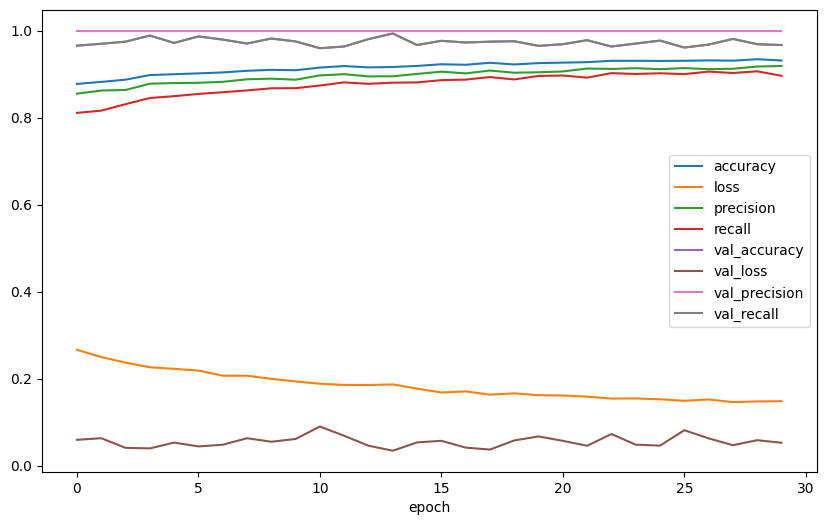

In [ ]:
#Hago un grafico con las metricas

history_df= pd.DataFrame(history.history)
history_df.plot(xlabel="epoch", figsize=(10,6));

In [ ]:
#Extraer los resultados de la ultima epoca
final_epoch = len(history.history['loss']) - 1  # Índice de la ultima epoca

#Mostrar metricas de la ultima epoca
print("Resultados de la ultima epoca:")
print("Perdida (loss):", round(history.history['loss'][final_epoch], 10))
print("Precision:", round(history.history['precision'][final_epoch], 10))
print("Recall:", round(history.history['recall'][final_epoch], 10))
print("Accuracy:", round(np.sqrt(history.history['accuracy'][final_epoch]), 10))

#Metricas de validacion de la última época:
print("Perdida de validacion (val_loss):", round(history.history['val_loss'][final_epoch], 10))
print("Precision de validacion:", round(history.history['val_precision'][final_epoch], 10))
print("Recall de validacion:", round(history.history['val_recall'][final_epoch], 10))
print("Accuracy de validación:", round(np.sqrt(history.history['val_accuracy'][final_epoch]), 10))

Resultados de la ultima epoca:
Perdida (loss): 0.1482151598
Precision: 0.9189010262
Recall: 0.8963513374
Accuracy: 0.9651305664
Perdida de validacion (val_loss): 0.0526749119
Precision de validacion: 1.0
Recall de validacion: 0.9670861363
Accuracy de validación: 0.9834053774


## **Scikit learn**

In [ ]:
#Se utilizan los mismos subconjutos X e y
#X = data[data.columns.drop("Churn")]
#y = data["Churn"]

#Se importan librerias
import sklearn as sk
from sklearn import model_selection
from sklearn import neural_network
from sklearn import metrics

In [ ]:
#Entreno el modelo con un 20% de test y fijo semilla 2024
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.20, random_state=2024)

In [ ]:
import numpy as np
from sklearn import neural_network
from sklearn.metrics import  precision_score, recall_score, accuracy_score

# Defino el tamaño (cantidad de neuronas) de las capas ocultas (capa entrada, capa oculta 1 = 56 , capa oculta 2 = 12 y capa de salida)
# Defino la función de activación (en este caso relu)
# Defino cantidad de iteraciones (en este caso 500)
# Fijo semilla 2024
clf = neural_network.MLPClassifier(hidden_layer_sizes=[56, 12], activation='relu', max_iter=500, random_state=2024)

# Entreno el modelo
clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=[56, 12], max_iter=500, random_state=2024)

In [ ]:
# Realizo las predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

In [ ]:
# Calculo y muestro las métricas
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Imprimo los resultados
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy", accuracy)

Precision: 0.850187265917603
Recall: 0.8606635071090047
Accuracy 0.851403678606002


### **Optimizacion**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

#Definir el grid de parametros: se agregan otras combinaciones
param_grid = {
    'hidden_layer_sizes': [(56, 12), (64, 32), (128, 64)],
    'activation': ['relu'],
    'max_iter': [200, 500, 1000],
}


#Aplicar GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='precision', verbose=2, n_jobs=-1)

#Ajustar el modelo
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo ajustado
best_model = grid_search.best_estimator_

#Realizar predicciones
predictions = best_model.predict(X_test)

#Calcular metricas
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)

# Imprimo los resultados
print("Best Parameters:", grid_search.best_params_)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy", accuracy)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (56, 12), 'max_iter': 200}
Precision: 0.850187265917603
Recall: 0.8606635071090047
Accuracy 0.851403678606002


## **Random Forest**

In [ ]:
#Se importan las librerias necesarias
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
#Crear el modelo de Random Forest para clasificacion
rf = RandomForestClassifier(n_estimators=100, random_state=2024)

#Entrenar el modelo en el conjunto de entrenamiento
rf.fit(X_train, y_train)

#Hacer predicciones en el conjunto de prueba
y_pred = rf.predict(X_test)


#Calcular la precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.10f}")

#Calcular la recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.10f}")

#Evaluar el rendimiento del modelo utilizando la accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.10f}")


Precision: 0.8956870612
Recall: 0.8464454976
Accuracy: 0.8712487899


### **Optimizacion**

In [ ]:
# Se importan las librerias necesarias
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score, recall_score, accuracy_score

#Definir el grid de hiperparámetros para el RandomForestClassifier
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [3, 5, 7]}

#Utilizar GridSearchCV con las metricas de precision, recall y accuracy
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score)}

#Crear el modelo de GridSearchCV para clasificacion
grid_rf = GridSearchCV(RandomForestClassifier(random_state=2024), param_grid, cv=10, scoring='precision')

# Entrenar el modelo en el conjunto de entrenamiento
grid_rf.fit(X_train, y_train)

# Imprimir los mejores hiperparametros y la mejor accuracy obtenida
print("Mejores hiperparametros:", grid_rf.best_params_)
print("Mejor precision promedio:", grid_rf.best_score_)


Mejores hiperparametros: {'max_depth': 7, 'n_estimators': 200}
Mejor precision promedio: 0.8115007709390918


In [ ]:
#Se usan los mejores estimadores encontrados por GridSearchCV
best_rf = grid_rf.best_estimator_

#Predicciones para el conjunto de prueba y entrenamiento
y_test_pred = best_rf.predict(X_test)
y_train_pred = best_rf.predict(X_train)

#Calcular las metricas para el conjunto de entrenamiento
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)

#Calcular las metricas para el conjunto de prueba
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)

#Formatear los valores con 10 decimales y organizar el formato en viñetas
resultados = [
    f"• Conjunto: Entrenamiento:\n  Precision: {precision_train:.10f}\n  Recall: {recall_train:.10f}\n  Accuracy: {accuracy_train:.10f}",
    f"• Conjunto: Prueba:\n  Precision: {precision_test:.10f}\n  Recall: {recall_test:.10f}\n  Accuracy: {accuracy_test:.10f}"
]

#Mostrar los resultados uno debajo del otro
for resultado in resultados:
    print(resultado)


• Conjunto: Entrenamiento:
  Precision: 0.8238318802
  Recall: 0.8970301850
  Accuracy: 0.8533898305
• Conjunto: Prueba:
  Precision: 0.8355437666
  Recall: 0.8957345972
  Accuracy: 0.8567279768


## **Gradient Boosting**

In [ ]:
import sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score

#Crear el modelo de Gradient Boosting para clasificacion binaria
gbc = GradientBoostingClassifier(n_estimators=100, random_state=2024)
gbc.fit(X_train, y_train)

#Hacer predicciones en el conjunto de prueba
ypred_test_gbc = gbc.predict(X_test)

#Calcular la precision
precision = precision_score(y_test, ypred_test_gbc)
print(f"Precision: {precision:.10f}")

#Calcular el recall
recall = recall_score(y_test, ypred_test_gbc)
print(f"Recall: {recall:.10f}")

#Calcular la exactitud (accuracy)
accuracy = accuracy_score(y_test, ypred_test_gbc)
print(f"Accuracy: {accuracy:.10f}")


Precision: 0.8825242718
Recall: 0.8616113744
Accuracy: 0.8707647628


### **Optimizacion**

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

#Varias opciones de modelos para encontrar los mejores parámetros
lr_list = [0.1, 0.25, 0.5, 0.75, 1]
ne_list = [50, 100, 150, 200, 250, 300, 400, 500]

LR_GBc = []
NE_GBc = []
precision_test = []
recall_test = []
accuracy_test = []

for learning_rate in lr_list:
    for n_estimators in ne_list:
        gbc = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=2024)
        gbc.fit(X_train, y_train)

        #Almacenar los parametros
        LR_GBc.append(learning_rate)
        NE_GBc.append(n_estimators)

        #Hacer predicciones
        y_pred_test = gbc.predict(X_test)

        #Calcular y almacenar las metricas
        precision_test.append(round(precision_score(y_test, y_pred_test), 4))
        recall_test.append(round(recall_score(y_test, y_pred_test), 4))
        accuracy_test.append(round(accuracy_score(y_test, y_pred_test), 4))

#Imprimir las listas de resultados y convertirlas en un DataFrame ordenándolo por precision más alta
import pandas as pd

resultados_GB = pd.DataFrame({
    'Learning Rate': LR_GBc,
    'Number of Estimators': NE_GBc,
    'Precision': precision_test,
    'Recall': recall_test,
    'Accuracy': accuracy_test
})

resultados_GB = pd.DataFrame(resultados_GB)
resultados_GB.sort_values('Precision', ascending=False, inplace=True)
resultados_GB.head(10)

,Learning Rate,Number of Estimators,Precision,Recall,Accuracy
6,0.10,400,0.8938,0.8455,0.8698
5,0.10,300,0.8917,0.8502,0.8708
3,0.10,200,0.8913,0.8550,0.8727
4,0.10,250,0.8894,0.8540,0.8712
11,0.25,200,0.8883,0.8370,0.8630
2,0.10,150,0.8882,0.8588,0.8727
13,0.25,300,0.8877,0.8313,0.8601
10,0.25,150,0.8877,0.8389,0.8635
7,0.10,500,0.8863,0.8351,0.8611
14,0.25,400,0.8853,0.8265,0.8567


In [ ]:
#Aplicacion
gbc_final = GradientBoostingClassifier(n_estimators=400, learning_rate=0.1, random_state=2024)
gbc_final.fit(X_train, y_train)
y_pred_test_gbc_final = gbc_final.predict(X_test)

In [ ]:
#Calcular y mostrar las metricas finales
precision_final = round(precision_score(y_test, y_pred_test_gbc_final), 10)
recall_final = round(recall_score(y_test, y_pred_test_gbc_final), 10)
accuracy_final = round(accuracy_score(y_test, y_pred_test_gbc_final), 10)

print("Precision:", precision_final)
print("Recall:", recall_final)
print("Accuracy:", accuracy_final)


Precision: 0.8937875752
Recall: 0.8454976303
Accuracy: 0.8697967086


Finalmente, se puede concluir que los métodos tradicionales son mas homogeneos en terminos de metricas para predecir que las redes neuronales de Keras y de Scikit learn pero dada la alta precisión, el recall y la accuracy del modelo de Keras, recomendaría optar por este modelo como el mejor para predecir el Churn de clientes en el conjunto de datos. Ademas, su rendimiento en el conjunto de validación sugiere que tiene una buena capacidad de generalización, lo cual es crucial para aplicaciones en el mundo real.

# **Informe**

https://docs.google.com/document/d/1p8a9ZQRiewY2ONfN3aWNlQCZNH_RONk2QpSU9sNATHU/edit?usp=sharing